In [ ]:
import numpy as np  # For numerical processing
import matplotlib.pyplot as plt  # For plotting data
from sklearn.datasets import load_breast_cancer  # Importing Breast Cancer dataset
from sklearn import datasets  # General dataset utilities
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import (
    LogisticRegression,
    LinearRegression,
)  # For performing Logistic and Linear Regression
from sklearn.svm import SVC  # For performing SVM
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    mean_squared_error,
)  # For evaluating models

# Problem 1


In [ ]:
# Train/Calculate Precision and Recall (Brandon)
def train_evaluate_model(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return precision, recall

In [ ]:
# Create and Evaluate Models with Incrementation (Nolan)
def create_and_increment(clf_type, X_train, X_test, y_train, y_test, max_features):
    precision_scores = []
    recall_scores = []
    confusion_matrices = []  # Initialize a list to store confusion matrices

    for num_features in range(1, max_features + 1):  # Increment through features
        # Select Features ^ should increment
        X_train_sub = X_train[:, :num_features]
        X_test_sub = X_test[:, :num_features]

        # Models based on classifier
        if clf_type == "LogisticRegression":
            clf = LogisticRegression(max_iter=10000, random_state=0)
        elif clf_type == "SVM_Linear":
            clf = SVC(random_state=0, kernel="linear")
        elif clf_type == "SVM_Gaussian":
            clf = SVC(random_state=0, kernel="rbf")

        # Train and Evaluate
        precision, recall = train_evaluate_model(
            clf, X_train_sub, X_test_sub, y_train, y_test
        )  # Only unpack two values
        precision_scores.append(precision)
        recall_scores.append(recall)

        # Calculate and store the confusion matrix
        y_pred = clf.predict(X_test_sub)
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices.append(cm)

    return precision_scores, recall_scores, confusion_matrices

In [ ]:
# Creating Confusion Matrix (Brandon)
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    classes = ["Malignant", "Benign"]  # Assuming 0 is Malignant, 1 is Benign
    tick_marks = np.arange(len(classes))
    plt.yticks(tick_marks, classes)
    plt.xticks(tick_marks, classes)

    # Add labels to each cell
    thresh = cm.max() / 2.0  # Finding middle of each cell
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(
                j,
                i,
                format(cm[i, j], "d"),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
            )  # Determine Text Color

    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

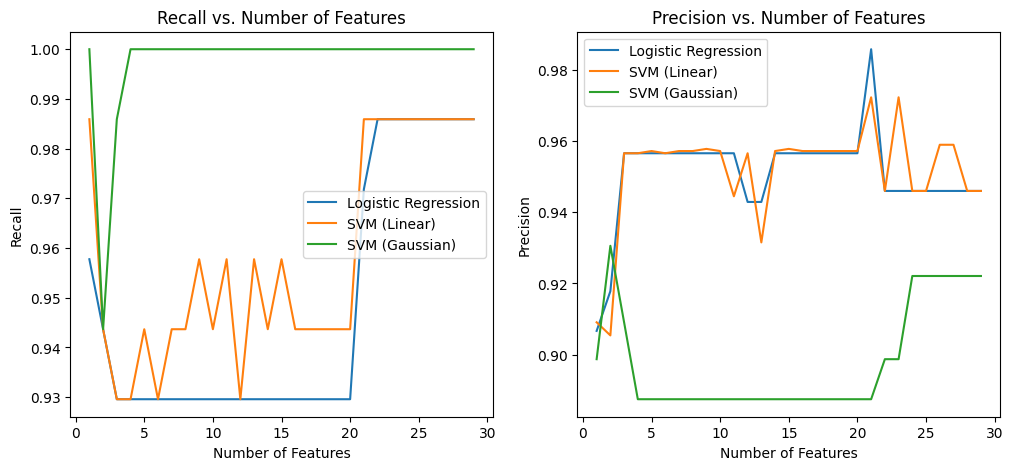

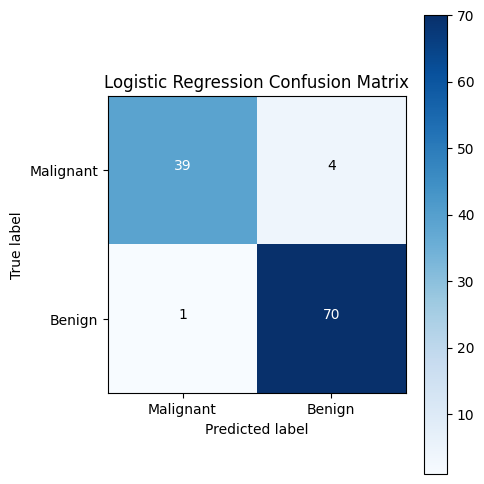

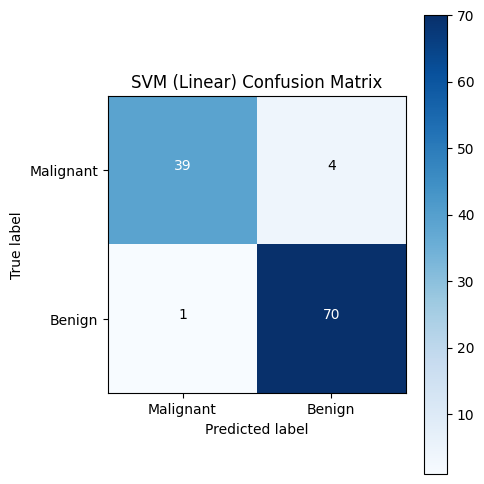

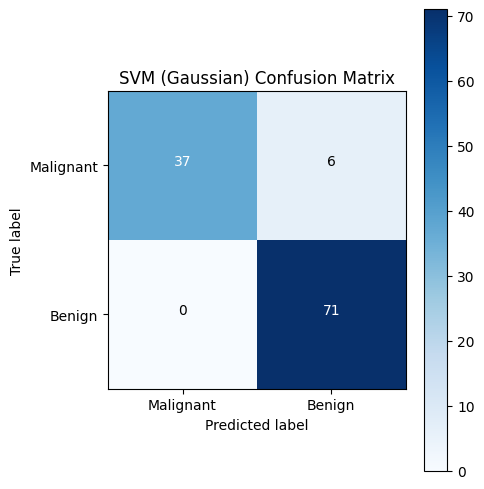

<Figure size 640x480 with 0 Axes>

In [ ]:
# Load the breast cancer dataset (Nolan)
breastCancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    breastCancer.data, breastCancer.target, test_size=0.2, random_state=42
)

# Define number of features for this data set
max_features = 29  # 29 Total Features

precision_scores_lr, recall_scores_lr, cm_lr = create_and_increment(
    "LogisticRegression", X_train, X_test, y_train, y_test, max_features
)
precision_scores_svm_linear, recall_scores_svm_linear, cm_svm_linear = (
    create_and_increment("SVM_Linear", X_train, X_test, y_train, y_test, max_features)
)
precision_scores_svm_gaussian, recall_scores_svm_gaussian, cm_svm_gaussian = (
    create_and_increment("SVM_Gaussian", X_train, X_test, y_train, y_test, max_features)
)

# Plot the results
plt.figure(figsize=(12, 5))

# Plotting Recall Scores
plt.subplot(1, 2, 1)
plt.plot(range(1, max_features + 1), recall_scores_lr, label="Logistic Regression")
plt.plot(range(1, max_features + 1), recall_scores_svm_linear, label="SVM (Linear)")
plt.plot(range(1, max_features + 1), recall_scores_svm_gaussian, label="SVM (Gaussian)")
plt.xlabel("Number of Features")
plt.ylabel("Recall")
plt.title("Recall vs. Number of Features")
plt.legend()
# Plotting Precision Scores
plt.subplot(1, 2, 2)
plt.plot(range(1, max_features + 1), precision_scores_lr, label="Logistic Regression")
plt.plot(range(1, max_features + 1), precision_scores_svm_linear, label="SVM (Linear)")
plt.plot(
    range(1, max_features + 1), precision_scores_svm_gaussian, label="SVM (Gaussian)"
)
plt.xlabel("Number of Features")
plt.ylabel("Precision")
plt.title("Precision vs. Number of Features")
plt.legend()
# Plotting Confusion Matrices
plot_confusion_matrix(cm_lr[-1], "Logistic Regression Confusion Matrix")
plot_confusion_matrix(cm_svm_linear[-1], "SVM (Linear) Confusion Matrix")
plot_confusion_matrix(cm_svm_gaussian[-1], "SVM (Gaussian) Confusion Matrix")

plt.tight_layout()
plt.show()

# Problem 2


In [ ]:
# Load the california housing dataset (Brandon)
data = datasets.fetch_california_housing()
X, y = data.data, data.target  # capture the features data and target variables

# Display basic information about the dataset
print(f"Feature shape: {X.shape}")
print(f"Target shape: {y.shape}")

Feature shape: (20640, 8)
Target shape: (20640,)


In [ ]:
# Train and evaluate a model (Nolan)
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_test)
    return mse, y_pred_train, y_pred_test


# (Fernando)
def plot_results(
    X_train,
    y_train,
    X_test,
    y_test,
    y_train_pred,
    y_test_pred,
    title="Linear Regression",
):
    fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

    # Train set plot
    ax[0].scatter(X_train, y_train, color="blue", label="Train data points")
    ax[0].plot(
        X_train,
        y_train_pred,
        linewidth=3,
        color="tab:orange",
        label="Model predictions",
    )
    ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
    ax[0].legend()

    # Test set plot
    ax[1].scatter(X_test, y_test, color="blue", label="Test data points")
    ax[1].plot(
        X_test, y_test_pred, linewidth=3, color="tab:orange", label="Model predictions"
    )
    ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
    ax[1].legend()

    fig.suptitle(title)
    plt.show()


# Plot MSE vs number of features (Nolan)
def plot_mse_vs_features(num_features, mse_values, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(num_features, mse_values, label=f"MSE ({model_name})", marker="o")
    plt.xlabel("Number of Features")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.title(f"MSE vs. Number of Features ({model_name})")
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
# Function to train and evaluate regression models using only the first feature (Fernando)
def evaluate_simple_linear_regression(X_train, X_test, y_train, y_test):
    # Use only the first feature (column 0) for simple linear regression
    X_train_simple = X_train[:, [0]]
    X_test_simple = X_test[:, [0]]

    model = LinearRegression()
    mse, y_train_pred, y_test_pred = evaluate_model(
        model, X_train_simple, X_test_simple, y_train, y_test
    )
    print(f"Mean Squared Error (MSE) for Simple Linear Regression (1 feature): {mse}")

    # Plotting the results
    plot_results(
        X_train_simple,
        y_train,
        X_test_simple,
        y_test,
        y_train_pred,
        y_test_pred,
        title="Simple Linear Regression Results (1 Feature)",
    )

    return mse


# Function to train and evaluate regression models (Brandon)
def evaluate_mlr_regression_models(X_train, X_test, y_train, y_test):
    mse_values = []
    num_features = list(range(1, 14))  # Features from 1 to 13

    last_mse = None

    # Loop through the models using incremental number of features
    for num in num_features:
        X_train_subset = X_train[:, :num]
        X_test_subset = X_test[:, :num]

        model = LinearRegression()
        mse, y_pred_train, y_pred_test = evaluate_model(
            model, X_train_subset, X_test_subset, y_train, y_test
        )
        mse_values.append(mse)

        # Plot the regression results for the last model (using all features)
        if num == 13:
            last_mse = mse

    # Plot MSE vs Features curve
    plot_mse_vs_features(num_features, mse_values, "Multiple")

    return last_mse

In [ ]:
# Split the data into training and test sets (80% training, 20% test) (Fernando)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check the shapes of the training and test sets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (16512, 8)
Test data shape: (4128, 8)


Mean Squared Error (MSE) for Simple Linear Regression (1 feature): 0.7091157771765548


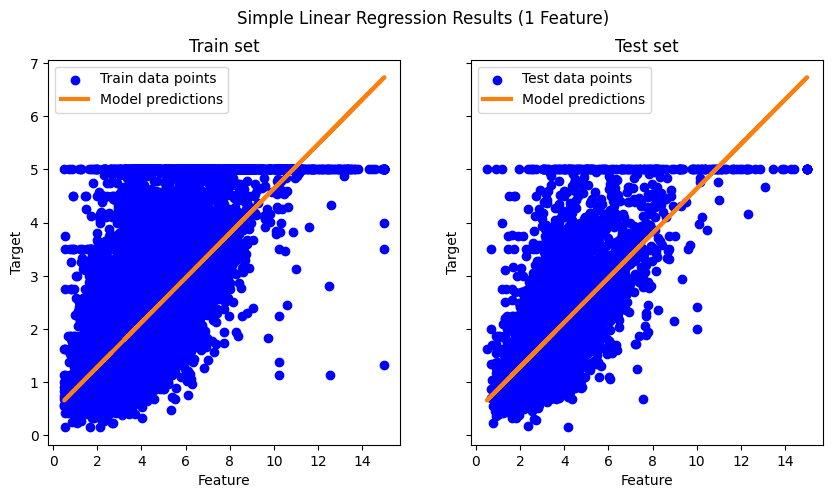

In [ ]:
# Evaluate Simple Linear Regression model using the first feature (Fernando)
simple_mse = evaluate_simple_linear_regression(X_train, X_test, y_train, y_test)

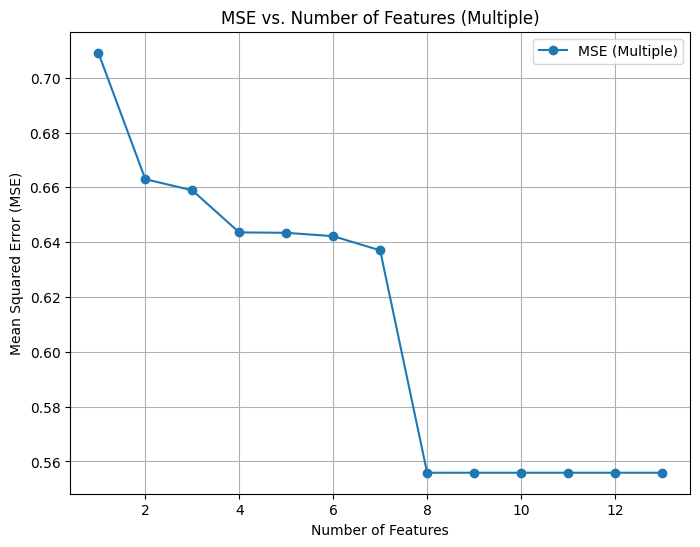

In [ ]:
# Evaluate Multiple Linear Regression model using all 13 features (Brandon)
multiple_mse = evaluate_mlr_regression_models(X_train, X_test, y_train, y_test)

In [ ]:
print(f"Mean Squared Error for Simple Linear Regression (1 feature): {simple_mse}")
print(
    f"Mean Squared Error for Multiple Linear Regression (13 features): {multiple_mse}"
)

if simple_mse < multiple_mse:
    print("Simple Linear Regression performed better (lower MSE).")
else:
    print("Multiple Linear Regression performed better (lower MSE).")

Mean Squared Error for Simple Linear Regression (1 feature): 0.7091157771765548
Mean Squared Error for Multiple Linear Regression (13 features): 0.5558915986952424
Multiple Linear Regression performed better (lower MSE).


## Conclusion for Problem 2 (Brandon)

Simple Linear Regression with one feature resulted in a poor fit, with an MSE of 0.709, indicating significant prediction errors - that is reflected in the `Simple Linear Regression Results (1 Feature)`. In contrast, Multiple Linear Regression using 13 features achieved a lower MSE of 0.556, showing improved performance.

The `MSE vs. Number of Features` plot shows a clear downward trend, indicating that as more features are added, the model's error decreases. A sharp drop around 8 features suggests a point where additional features significantly improve performance. However, beyond a certain point, the reduction in MSE slows, implying diminishing returns from adding more features. This highlights the importance of selecting relevant features for optimal model performance.